In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, accuracy
from nltk.classify.decisiontree import DecisionTreeClassifier
import random
import pickle
import matplotlib.pyplot as plt

Menggunakan pandas untuk melakukan load.
Menggunakan word tokenize untuk melakukan tokenisasi.
menggunakan stopwords untuk menghapus kata-kata yang tidak penting untuk dilatih.
menggunakan string untuk menghilangkan tanda baca atau symbol.
menggunakan stemming membalikan katanya kebentuk asal, karena dataset yang digunakan adalah bahasa indonesia maka tidak dapat menggunakan lemmatizer karena tidak ada library yang mensupport hal tersebut.  
menggunakan freqdist untuk menghitung frequensi kata.  
menggunakan naive bayes untuk melakukan classification dan accuracy untuk mencari akurasi dari model. 
menggunakan random untuk mengancak data yang akan di train. 
menggunakan pickle untuk menyimpan model yang telah dilatih.

In [6]:
dataset = pd.read_csv('reviews.csv')

In [7]:
dataset.head(5)

,reviews,label
0,kemeja nya bagusss bgtttt😍😍😍aaaa mauuu nngisss...,1.0
1,"Jahitannya sih rapi,cuman ada benang yang ikut...",0.0
2,Sesuai harga. Agak tipis tapi masih oke kok. W...,0.0
3,"Wah gila sihhh sebagus itu, se worth it, se l...",1.0
4,Kain nya bagus halus \nTapi kok di bukak koto...,0.0


In [8]:
dataset.shape

(831, 2)

In [9]:
label_mapping = {1: 'positive', 0 : 'negative'}
dataset['label'] = dataset['label'].map(label_mapping)

In [10]:
labels = dataset['label'].value_counts()

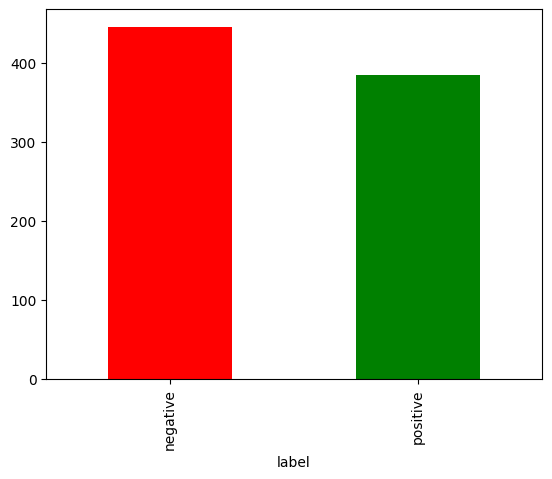

In [11]:
labels.plot(kind = 'bar', color = ['red', 'green'])
plt.show()

In [12]:
dataset.head(5)

,reviews,label
0,kemeja nya bagusss bgtttt😍😍😍aaaa mauuu nngisss...,positive
1,"Jahitannya sih rapi,cuman ada benang yang ikut...",negative
2,Sesuai harga. Agak tipis tapi masih oke kok. W...,negative
3,"Wah gila sihhh sebagus itu, se worth it, se l...",positive
4,Kain nya bagus halus \nTapi kok di bukak koto...,negative


In [13]:
indo_stopwords = stopwords.words('indonesian')
punctuation_list = string.punctuation
factory = StemmerFactory()
stemming = factory.create_stemmer()

def remove_stopwords(wlist):
    return [word for word in wlist if word not in indo_stopwords]

def remove_punctuation(wlist):
    return [word for word in wlist if word not in punctuation_list]

def remove_number(wlist):
    return [word for word in wlist if word.isalpha()]

def stemming_word(wlist):
    return [stemming.stem(word) for word in wlist]

def preprocess_text(wlist):
        wordList = word_tokenize(wlist)
        wordList = remove_stopwords(wordList)
        wordList = remove_punctuation(wordList)
        wordList = remove_number(wordList)
        wordList = stemming_word(wordList)
        return ' '.join(wordList)

Kita akan melakukan preprocessing data aga siap di training

Naive Bayes

In [14]:
def naive_bayes_train():
    review_list = dataset['reviews'].to_list()
    label_list = dataset['label'].to_list()
    
    wordList = [preprocess_text(review.lower()) for review in review_list]
    
    fd = FreqDist(wordList)
    word_features = [word for word, count in fd.most_common()]
    labeled_data = list(zip(review_list, label_list))
    
    features_set = []
    
    for sentence, label in labeled_data:
        features = {}
        checklist = preprocess_text(sentence)
        
        for word in word_features:
            features[word] = (word in checklist)
        
        features_set.append((features, label))
    
    random.shuffle(features_set)
    train_count = int(len(features_set) * 0.8)
    train_dataset = features_set[:train_count]
    test_dataset = features_set[train_count:]
    
    naive_bayes_classifier = NaiveBayesClassifier.train(train_dataset)
    naive_bayes_classifier.show_most_informative_features(n=5)
    print(f'Naive Bayes Model Accuracy: {accuracy(naive_bayes_classifier, test_dataset)}')
    
    file = open('naive_bayes_model.pickle', 'wb')
    pickle.dump(naive_bayes_classifier, file)
    file.close()
    
    return naive_bayes_classifier

Decision Tree

In [15]:
def decision_tree_train():
    review_list = dataset['reviews'].to_list()
    label_list = dataset['label'].to_list()

    wordList = [preprocess_text(review.lower()) for review in review_list]

    fd = FreqDist(wordList)
    word_features = [word for word, count in fd.most_common()]
    labeled_data = list(zip(review_list, label_list))

    features_set = []

    for sentence, label in labeled_data:
        features = {}
        checklist = preprocess_text(sentence)

        for word in word_features:
            features[word] = (word in checklist)
        
        features_set.append((features, label))

    random.shuffle(features_set)
    train_count = int(len(features_set) * 0.8)
    train_dataset = features_set[:train_count]
    test_dataset = features_set[train_count:]

    decision_tree_classifier = DecisionTreeClassifier.train(train_dataset)
    print(f'Decision Tree Model Accuracy: {accuracy(decision_tree_classifier, test_dataset)}')
            
    file = open('decision_tree_model.pickle', 'wb')
    pickle.dump(decision_tree_classifier, file)
    file.close()

    return decision_tree_classifier

Maximum Entropy

In [16]:
def maximum_entropy_train():
    review_list = dataset['reviews'].to_list()
    label_list = dataset['label'].to_list()

    wordList = [preprocess_text(review.lower()) for review in review_list]

    fd = FreqDist(wordList)
    word_features = [word for word, count in fd.most_common()]
    labeled_data = list(zip(review_list, label_list))

    features_set = []

    for sentence, label in labeled_data:
        features = {}
        checklist = preprocess_text(sentence)

        for word in word_features:
            features[word] = (word in checklist)
        
        features_set.append((features, label))

    random.shuffle(features_set)
    train_count = int(len(features_set) * 0.8)
    train_dataset = features_set[:train_count]
    test_dataset = features_set[train_count:]

    maximum_entropy_classifier = MaxentClassifier.train(train_dataset,max_iter=10)
    maximum_entropy_classifier.show_most_informative_features(n=5)
    print(f'Maximum Entropy Model Accuracy: {accuracy(maximum_entropy_classifier, test_dataset)}')

    file = open('maximum_entropy_model.pickle', 'wb')
    pickle.dump(maximum_entropy_classifier, file)
    file.close()

    return maximum_entropy_classifier

In [17]:
try:
    print('LOADING MODEL...')

    # Naive Bayes Model
    file = open('naive_bayes_model.pickle', 'rb')
    naive_bayes_classifier = pickle.load(file)
    file.close()

    # Decision Tree Model
    file = open('decision_tree_model.pickle', 'rb')
    decision_tree_classifier = pickle.load(file)
    file.close()

    # Maximum Entropy Model
    file = open('maximum_entropy_model.pickle', 'rb')
    maximum_entropy_classifier = pickle.load(file)
    file.close()

    print('LOADING MODELS COMPLETE')
except:
    print('NO MODELS FOUND')
    print('CREATING MODELS...')

    naive_bayes_classifier = naive_bayes_train()
    decision_tree_classifier = decision_tree_train()
    maximum_entropy_classifier = maximum_entropy_train()
    
    print('MODELS CREATED')

LOADING MODEL...
LOADING MODELS COMPLETE


In [18]:
def menu():
    print('Product Review')
    print('1. Write Review')
    print('2. Analyze Review')
    print('3. Exit')
    
    choice = input('Input your choice')
    return choice

In [19]:
def writeReview():
    while True:
        review = input('Input your review: ')
        cleaned = [word for word in word_tokenize(review) if word not in punctuation_list]
        if len(cleaned) < 5:
            print('Review must consist 5 words')
        else:
            break
        
    global reviewInput
    reviewInput = review
    input('press enter to continue')

In [20]:
def analyzeReview():

    print(f'Review = {reviewInput}')
    review = reviewInput.lower()
    tokenized_review = FreqDist(word_tokenize(review))

    print(f'Review Category (Naive Bayes): {naive_bayes_classifier.classify(tokenized_review)}')
    print(f'Review Category (Decision Tree): {decision_tree_classifier.classify(tokenized_review)}')
    print(f'Review Category (Maximum Entropy): {maximum_entropy_classifier.classify(tokenized_review)}')

In [21]:
while True:
    choice = menu()
    if choice == '1':
        writeReview()
    elif choice == '2':
        analyzeReview()
    elif choice == '3':
        print('Thank you')
        break
    else:
        print('Invalid input')

Product Review
1. Write Review
2. Analyze Review
3. Exit
Review must consist 5 words
Review must consist 5 words
Product Review
1. Write Review
2. Analyze Review
3. Exit
Review = jelek banget cok asli parah gila
Review Category (Naive Bayes): negative
Review Category (Decision Tree): negative
Review Category (Maximum Entropy): positive
Product Review
1. Write Review
2. Analyze Review
3. Exit
Product Review
1. Write Review
2. Analyze Review
3. Exit
Review = bagus banget woi bajunya keren banget
Review Category (Naive Bayes): positive
Review Category (Decision Tree): positive
Review Category (Maximum Entropy): positive
Product Review
1. Write Review
2. Analyze Review
3. Exit
Thank you
